In [1]:
import os
import numpy as np
import pandas as pd
import time
import warnings
from matplotlib import pyplot as plt

from sklearn.neural_network import MLPClassifier
import sklearn.metrics
from sklearn.metrics import balanced_accuracy_score

from sklearn.metrics import confusion_matrix
import seaborn as sns


### Data Preprocessing

Contents of train_x.csv: arr of shape (2102, 784)
Contents of valid_x.csv: arr of shape (600, 784)


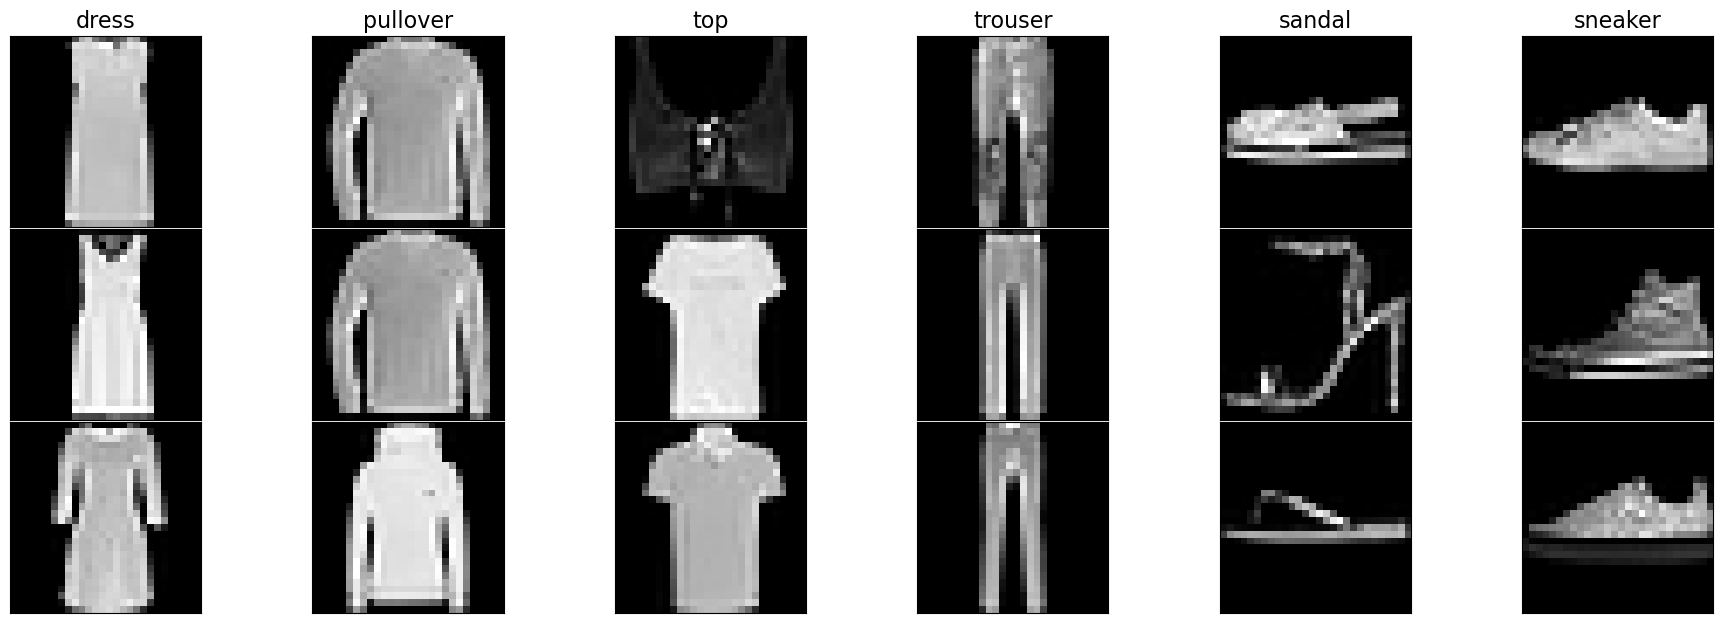

In [2]:
%run load_and_plot_data.py

In [3]:
# valid_y_df[50:]

In [4]:
# temp = np.array(train_y_df)
# count_array = temp[:,1]
# count_train = np.unique(count_array, return_counts = True)

# temp = np.array(valid_y_df)
# count_array = temp[:,1]
# count_valid = np.unique(count_array, return_counts = True)

In [5]:
# count_train, count_valid

In [6]:
train_y = np.array(train_y_df['class_uid'])
valid_y = np.array(valid_y_df['class_uid'])
train_x = train_x
valid_x = valid_x
train_y.shape, valid_y.shape

((2102,), (600,))

In [7]:
train_x.shape, train_x[0].dtype

((2102, 784), dtype('int64'))

In [8]:
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(train_x)
normed_train_x = scaler.transform(train_x)
normed_valid_x = scaler.transform(valid_x)

In [10]:
mlp = MLPClassifier(
            activation='relu',
            solver='adam',
            batch_size=1000,
            momentum=0.0,
            tol=1e-5,
            early_stopping=False,
            n_iter_no_change = 10
            )
n = 8
random_states = np.random.randint(1, 1000, size=n)
# random_states = [1221,1,1234,4321]

In [11]:
random_states

array([491, 633, 958, 949, 197, 818, 485, 284])

In [12]:
mlp_hyperparameter_grid = dict(
    hidden_layer_sizes = [ (600, )], 
    max_iter= [ 500, 2000 ],
    random_state = random_states,
    alpha= [1e2, 1e0, 1e-3,]#[1e-1, 1e-2, 1e-3, 1e-4, 1e-5] #[1e-2, 1e-10] 
    )

# mlp_hyperparameter_grid = {
#     'hidden_layer_sizes': [(25,),(50,), (100,), (150,)],  
#     'alpha': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6],  
#     'max_iter': [50, 100, 150],  
#     'tol': [1e-4, 1e-5, 1e-6],  
#     'solver': ['lbfgs'], 
#     'learning_rate': ['constant', 'adaptive'],  
# }

### fit on train

In [13]:
xall = np.vstack([normed_train_x, normed_valid_x])
yall = np.hstack([train_y, valid_y])

### splitter
valid_indicators_L = np.hstack([
    -1 * np.ones(train_y.size), # -1 means never include this example in any test split
    0  * np.ones(valid_y.size), #  0 means include in the first test split (we count starting at 0 in python)
    ])
my_splitter = sklearn.model_selection.PredefinedSplit(valid_indicators_L)

In [14]:
mlp_searcher = sklearn.model_selection.GridSearchCV(estimator = mlp,
                                                    param_grid = mlp_hyperparameter_grid,
                                                    scoring = 'balanced_accuracy',
                                                    cv = my_splitter,
                                                    return_train_score = True,
                                                    refit=False
                                                   )

In [15]:
# sklearn.metrics.get_scorer_names()

In [16]:
start_time_sec = time.time()
mlp_searcher.fit(xall, yall)
elapsed_time_sec = time.time() - start_time_sec

/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
mlp_searcher_result = pd.DataFrame(mlp_searcher.cv_results_).copy()
mlp_searcher_result[:50]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,param_max_iter,param_random_state,params,split0_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,mean_train_score,std_train_score
0,7.936187,0.0,0.008928,0.0,10.0,"(600,)",500,96,"{'alpha': 10.0, 'hidden_layer_sizes': (600,), ...",0.626667,0.626667,0.0,117,0.626042,0.626042,0.0
1,8.826986,0.0,0.009166,0.0,10.0,"(600,)",500,317,"{'alpha': 10.0, 'hidden_layer_sizes': (600,), ...",0.630000,0.630000,0.0,113,0.620208,0.620208,0.0
2,6.796303,0.0,0.009976,0.0,10.0,"(600,)",500,335,"{'alpha': 10.0, 'hidden_layer_sizes': (600,), ...",0.640000,0.640000,0.0,97,0.633750,0.633750,0.0
3,6.897790,0.0,0.008719,0.0,10.0,"(600,)",500,42,"{'alpha': 10.0, 'hidden_layer_sizes': (600,), ...",0.620000,0.620000,0.0,123,0.612292,0.612292,0.0
4,8.468290,0.0,0.012150,0.0,10.0,"(600,)",500,229,"{'alpha': 10.0, 'hidden_layer_sizes': (600,), ...",0.618333,0.618333,0.0,125,0.621458,0.621458,0.0
5,7.272650,0.0,0.007399,0.0,10.0,"(600,)",500,377,"{'alpha': 10.0, 'hidden_layer_sizes': (600,), ...",0.636667,0.636667,0.0,99,0.626458,0.626458,0.0
6,8.216434,0.0,0.014428,0.0,10.0,"(600,)",500,336,"{'alpha': 10.0, 'hidden_layer_sizes': (600,), ...",0.633333,0.633333,0.0,107,0.627083,0.627083,0.0
7,9.273886,0.0,0.009748,0.0,10.0,"(600,)",500,101,"{'alpha': 10.0, 'hidden_layer_sizes': (600,), ...",0.630000,0.630000,0.0,113,0.630208,0.630208,0.0
8,9.106001,0.0,0.030140,0.0,10.0,"(600,)",2000,96,"{'alpha': 10.0, 'hidden_layer_sizes': (600,), ...",0.626667,0.626667,0.0,117,0.626042,0.626042,0.0
9,8.955518,0.0,0.006856,0.0,10.0,"(600,)",2000,317,"{'alpha': 10.0, 'hidden_layer_sizes': (600,), ...",0.630000,0.630000,0.0,113,0.620208,0.620208,0.0


In [171]:
idx = np.argmax(mlp_searcher_result.mean_test_score)
# idx =50
mlp_searcher_result.params[idx]

{'alpha': 10.0,
 'hidden_layer_sizes': (1200,),
 'max_iter': 40,
 'random_state': 355}

In [172]:
mi = mlp_searcher_result.params[idx]['max_iter']
hlz = mlp_searcher_result.params[idx]['hidden_layer_sizes']
a = mlp_searcher_result.params[idx]['alpha']
mi, hlz

(40, (1200,))

In [173]:
mean_results = mlp_searcher_result.mean_test_score
mean_results = np.array(mean_results)
mean_results = np.reshape(mean_results, (mean_results.shape[0]//n ,n))
mean_results = np.mean(mean_results, axis=1)
print(mean_results)



[0.59833333 0.608125   0.608125   0.608125   0.62583333 0.6275
 0.6275     0.6275     0.62416667 0.62416667 0.62416667 0.62416667
 0.62958333 0.629375   0.629375   0.629375   0.59291667 0.60145833
 0.60145833 0.60145833 0.62625    0.62625    0.62625    0.62625
 0.62583333 0.625625   0.625625   0.625625   0.63104167 0.63104167
 0.63104167 0.63104167 0.59291667 0.60145833 0.60145833 0.60145833
 0.62604167 0.62604167 0.62604167 0.62604167 0.62583333 0.625625
 0.625625   0.625625   0.63104167 0.63104167 0.63104167 0.63104167
 0.59291667 0.60145833 0.60145833 0.60145833 0.62604167 0.62604167
 0.62604167 0.62604167 0.62583333 0.625625   0.625625   0.625625
 0.63104167 0.63104167 0.63104167 0.63104167]


In [102]:
t = np.argmax(mean_results)
print(t,np.max(mean_results))
# mlp_searcher_result.params[t*n]

65 0.6814583333333334


In [103]:
# mi = 40
# hlz = (200,)
# a = 0.001

# get the average of all the results
desired_runs = []

for i in range(mlp_searcher_result.shape[0]):
    params = mlp_searcher_result.params[i]
    if params['max_iter'] == mi and params['hidden_layer_sizes'] == hlz and params['alpha'] == a:
        desired_runs.append(i)

# Print or process the desired runs
results = []
for run in desired_runs:
    r = mlp_searcher_result.mean_test_score[run]
    print(r)
    results.append(r)

np.mean(results)


0.6549999999999999
0.6633333333333333
0.6466666666666667
0.7633333333333333
0.695
0.6466666666666666
0.6633333333333333
0.7183333333333334


0.6814583333333334

In [97]:
# plot hyperparameter search result
balanced_accuracy_score = mlp_searcher_result.mean_test_score
alpha_list = mlp_searcher_result.param_alpha
random_seeds = mlp_searcher_result.param_random_state
train_BAcc_d = mlp_searcher_result.mean_train_score
# alpha_list, balanced_accuracy_score, random_seeds

In [ ]:
colors = ['black', 'b', 'g', 'y', 'magenta', 'pink', 'grey', 'brown']
log_alpha_list = alpha_list.copy()
for i in range(len(alpha_list)):
    # print(alpha_list[i])
    # print(np.log10(alpha_list[i]))
    log_alpha_list[i] = np.log10(alpha_list[i])

# log_alpha_list

In [ ]:
log_alphas = np.zeros((n,5))
BAccs = np.zeros((n,5))
Train_BAccs = np.zeros((n,5))

for i in range(len(np.unique(alpha_list))): # 5
    for j in range(len(np.unique(random_seeds))): #4
        # plt.plot(log_alpha_list[i*len(np.unique(random_seeds)) + j], balanced_accuracy_score[i*len(np.unique(random_seeds)) + j], marker='o', linestyle='-', color=colors[j])
        log_alphas[j,i] = log_alpha_list[i*len(np.unique(random_seeds)) + j]
        BAccs[j,i] = balanced_accuracy_score[i*len(np.unique(random_seeds)) + j]
        Train_BAccs[j,i] = train_BAcc_d[i*len(np.unique(random_seeds)) + j]


In [ ]:
mean_valid_BAccs = []
for i in range(log_alphas.shape[1]):
    # print(log_alphas[:,i])
    mean_valid_BAccs.append(np.mean(BAccs[:,i]))
    
mean_valid_BAccs = np.array(mean_valid_BAccs[::-1])
mean_valid_BAccs.shape

In [ ]:
for m in range(len(np.unique(random_seeds))):    
    plt.plot(log_alphas[m], BAccs[m], marker='o', linestyle='-', color=colors[m], alpha=0.3)

plt.plot(np.unique(log_alphas), mean_valid_BAccs, marker='o', linestyle='-', color='red')
    
plt.title('Alpha Value vs Balanced Accuracy')
plt.xlabel( 'Alpha Value (1e(x))')
plt.ylabel('Balanced Accuracy')
plt.grid(True)
plt.show()
# log_alphas.shape, BAccs.shape

In [ ]:
mlp_searcher.best_params_

In [27]:
# best_param = mlp_searcher.best_params_
manual_param = {'alpha': 0.001,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'adaptive',
 'max_iter': 100,
 'solver': 'lbfgs',
 'tol': 1e-05}

In [28]:
best_mlp = mlp 
best_mlp.set_params(**manual_param)
best_mlp.fit(normed_train_x, train_y)

MLPClassifier(alpha=0.001, learning_rate='adaptive', max_iter=100, momentum=0.0,
              solver='lbfgs', tol=1e-05)

In [29]:
pred_y = best_mlp.predict(normed_valid_x)
best_mlp_BAcc = sklearn.metrics.balanced_accuracy_score(valid_y, pred_y)
best_mlp_BAcc

0.6649999999999999

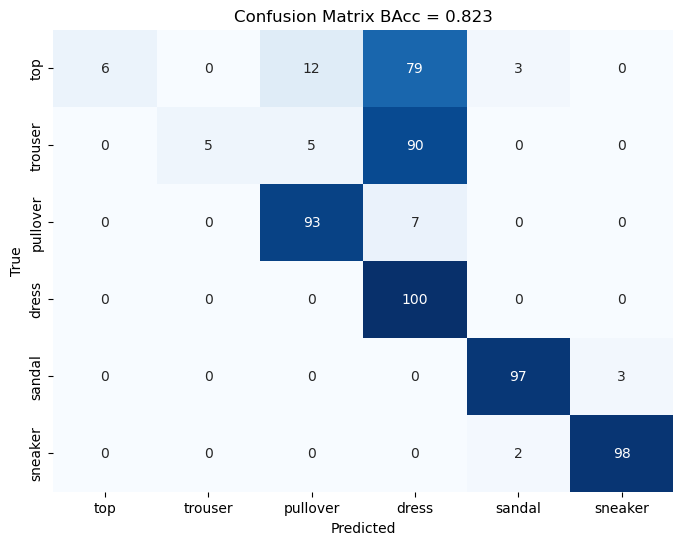

In [30]:
conf_matrix = confusion_matrix(valid_y, pred_y)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['top', 'trouser', 'pullover', 'dress', 'sandal', 'sneaker'],
            yticklabels=['top', 'trouser', 'pullover', 'dress', 'sandal', 'sneaker'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix BAcc = 0.823')
plt.show()

In [31]:
test_x = pd.read_csv(os.path.join("data_fashion", "x_test.csv")).to_numpy()
test_x = test_x[:210]

In [32]:
# # Reshape the array to have images as rows and pixels as columns (28x28)
# images_reshaped = test_x.reshape(-1, 28, 28)

# # Plotting the images in a grid
# num_images = images_reshaped.shape[0]
# num_rows = 20  # Number of rows in the grid
# num_cols = num_images // num_rows

# fig, axes = plt.subplots(num_rows, num_cols, figsize=(50, 50))

# for i, ax in enumerate(axes.flat):
#     ax.imshow(images_reshaped[i], cmap='gray')
#     ax.axis('off')

# plt.subplots_adjust(wspace=0.1, hspace=0.1)  # Adjust spacing between subplots
# plt.show()

In [33]:
test_y = [0,1,0,0,3,0,5,0,3,5,3,0,1,5,7,1,5,7,7,1,0,0,0,0,0,0,3,3,0,3,
          0,0,3,0,0,5,1,1,0,5,0,7,3,5,7,1,1,1,0,1,3,0,0,0,5,5,3,3,0,0,
          4,0,7,5,5,3,0,7,5,0,0,7,0,0,5,7,0,7,0,3,1,7,0,3,3,3,0,0,0,0,
          1,3,3,3,1,3,3,3,5,7,7,3,0,0,7,0,0,0,0,5,7,1,3,1,5,5,0,7,1,0,
          0,3,0,0,0,5,5,0,1,0,7,1,5,0,0,5,7,7,3,0,5,7,1,5,0,7,0,0,1,5,
          7,7,0,0,5,3,3,1,0,3,3,0,0,0,3,0,0,7,0,5,5,7,0,3,1,0,0,0,1,1,
          3,3,1,7,0,5,0,0,7,7,7,7,1,7,7,0,0,0,0,5,0,5,7,7,1,0,7,3,1,3,
          ]

In [34]:
normed_test_x = scaler.transform(test_x)
best_mlp.fit(xall,yall)
pred_y = best_mlp.predict(normed_test_x)
best_mlp_BAcc = sklearn.metrics.balanced_accuracy_score(test_y, pred_y)
best_mlp_BAcc


/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/richardwang/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


0.6859788359788359

In [ ]:
# for i in range(len(np.unique(alpha_list))): # 5
#     for j in range(len(np.unique(random_seeds))): #4
#         plt.plot(log_alpha_list[i*4 + j], balanced_accuracy_score[i*4 + j], marker='o', linestyle='-', color=colors[j])
        
# plt.title('Alpha Value vs Balanced Accuracy')
# plt.xlabel('Alpha Value')
# plt.ylabel('Balanced Accuracy')
# plt.grid(True)
# plt.show()

In [ ]:
pred_y

In [ ]:
if y is 